<a href="https://colab.research.google.com/github/pranjalko/Computer_Vision/blob/main/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


In [ ]:
transform = transforms.ToTensor()

# transform = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.5), (0.5))
# ])

mnist_data = datasets.MNIST(root='./data' , train=True , download=True , transform = transform)

data_loader = torch.utils.data.DataLoader(dataset=mnist_data, batch_size=64, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 150328896.44it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 86649280.27it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 50196997.98it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 3035457.10it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
dataiter = iter(data_loader)
images, labels = next(dataiter)
print(torch.min(images) , torch.max(images))

tensor(0.) tensor(1.)


In [ ]:
class Autoencoder(nn.Module):
  def __init__(self):

    super().__init__()
    self.encoder = nn.Sequential(
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 12),
        nn.ReLU(),
        nn.Linear(12,3)
    )

    self.decoder = nn.Sequential(
        nn.Linear(3, 12),
        nn.ReLU(),
        nn.Linear(12, 64),
        nn.ReLU(),
        nn.Linear(64, 128),
        nn.ReLU(),
        nn.Linear(128, 28*28),
        nn.Sigmoid()
    )

  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded




In [ ]:
model = Autoencoder()
criterian = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters() , lr = 1e-3 , weight_decay=1e-5)


In [ ]:
num_epochs = 10
outputs = []

for epoch in range(num_epochs):
  for (img, _) in data_loader:
    img = img.reshape(-1, 28*28)
    recon = model(img)
    loss = criterian(recon, img)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
  outputs.append((epoch, img , recon))


Epoch:1, Loss:0.0564
Epoch:2, Loss:0.0523
Epoch:3, Loss:0.0456
Epoch:4, Loss:0.0406
Epoch:5, Loss:0.0360
Epoch:6, Loss:0.0392
Epoch:7, Loss:0.0423
Epoch:8, Loss:0.0341
Epoch:9, Loss:0.0346
Epoch:10, Loss:0.0340


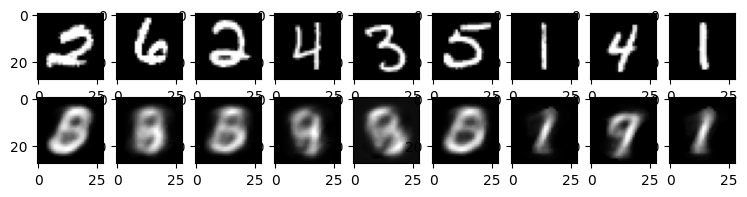

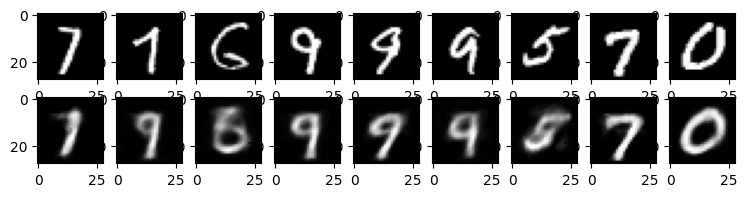

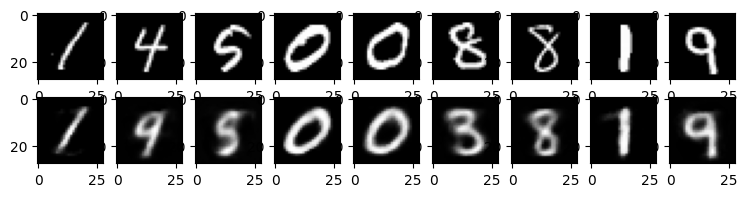

In [ ]:
for k in range(0 , num_epochs , 4):
  plt.figure(figsize=(9,2))
  plt.gray()
  imgs = outputs[k][1].detach().numpy()
  recon = outputs[k][2].detach().numpy()

  for i , item in enumerate(imgs):
    if i >= 9:break
    plt.subplot(2 , 9 , i+1)
    item = item.reshape(-1, 28, 28)

    plt.imshow(item[0])

  for i, item in enumerate(recon):
    if i >= 9: break
    plt.subplot(2 , 9 , 9+i+1)
    item = item.reshape(-1, 28, 28)
    plt.imshow(item[0])